In [1]:
import numpy as np

In [2]:
CEM = np.load("LogFiles/CEMLogfiles.npy", allow_pickle=True)
DE = np.load("LogFiles/DELogFiles.npy", allow_pickle=True)

In [3]:
objectives = ['Sphere Function', 'Griewank Function', 'Rosenbrock Function', 'Michalewicz Function', 'Ackley Function' ]
N = [16, 32, 64, 128, 256]
dimensions = [2, 10]
MSSV = 21521413

DE_statistic_table = {}
CEM_statistic_table = {}
for objective in objectives:
  for d in dimensions:
    for n in N:
        DE_array = []
        CEM_array = []
        for i in range(10):
            key = (objective, d, n, MSSV+i)
            DE_array.append(DE.item()[key][1])
            CEM_array.append(CEM.item()[key][1])
        DE_mean, DE_std = np.mean(DE_array), np.std(DE_array)
        CEM_mean, CEM_std = np.mean(CEM_array), np.std(CEM_array)

        DE_statistic_table[(objective, d, n)] = [DE_mean, DE_std]
        CEM_statistic_table[(objective, d, n)] = [CEM_mean, CEM_std]
        
            

In [4]:
for objective in objectives:
  for d in dimensions:
    print(f"Objective - {objective} Dim - {d}")
    for n in N:
        key = (objective, d, n)

        print('Popsize:', n)
        print("DE", DE_statistic_table[key])
        print("CEM", CEM_statistic_table[key])
    print("\n\n\n-----------------------")

Objective - Sphere Function Dim - 2
Popsize: 16
DE [0.0, 0.0]
CEM [0.0002550442544816178, 0.0002325960395765085]
Popsize: 32
DE [0.0, 0.0]
CEM [9.170328826257901e-05, 9.159004162201093e-05]
Popsize: 64
DE [0.0, 0.0]
CEM [4.223867872497067e-05, 4.1986314601216484e-05]
Popsize: 128
DE [2.1502194600725486e-36, 1.4269857434020073e-36]
CEM [1.941175980277876e-05, 2.3221269454590263e-05]
Popsize: 256
DE [1.3450317443946528e-16, 1.3978208189480938e-16]
CEM [4.611816217447995e-06, 4.150464867585048e-06]



-----------------------
Objective - Sphere Function Dim - 10
Popsize: 16
DE [6.671282992178063e-14, 2.0013848976534188e-13]
CEM [0.12225338127464055, 0.05895274338398357]
Popsize: 32
DE [0.0, 0.0]
CEM [0.018980009574443103, 0.005276064188779158]
Popsize: 64
DE [0.0, 0.0]
CEM [0.011665178462862968, 0.003296513545633844]
Popsize: 128
DE [8.355605492267475e-38, 1.1754358998578722e-37]
CEM [0.0060952416155487295, 0.0015874414049257873]
Popsize: 256
DE [1.0785995127605603e-17, 8.066230835532068e-

## Visualization 

In [36]:
import matplotlib.pyplot as plt

def plotting(x_DE, x_CEM, y_DE, y_std_DE, y_CEM, y_std_CEM, ylabel):
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.plot(x_DE, y_DE, '-', label=f"DE-128", color='tab:red')
    ax.fill_between(x_DE, y_DE - y_std_DE, y_DE + y_std_DE, alpha=0.2, color='tab:red')
    ax.plot(x_DE, y_DE, 'o', color='tab:red', markersize=3)
    
    ax.plot(x_CEM, y_CEM, '-', label=f"CEM-128", color='tab:blue')
    ax.fill_between(x_CEM, y_CEM - y_std_CEM, y_CEM + y_std_CEM, alpha=0.2, color='tab:blue')
    ax.plot(x_CEM, y_CEM, 'o', color='tab:blue', markersize=3)
    
    plt.xlabel("Number of fitness evaluations")
    plt.ylabel(f"{ylabel} value")
    plt.legend()
    plt.savefig(ylabel, dpi=300)  # Export as PNG with 300 dpi resolution

In [7]:
ProcessResult = np.load("results.npy", allow_pickle=True).item()

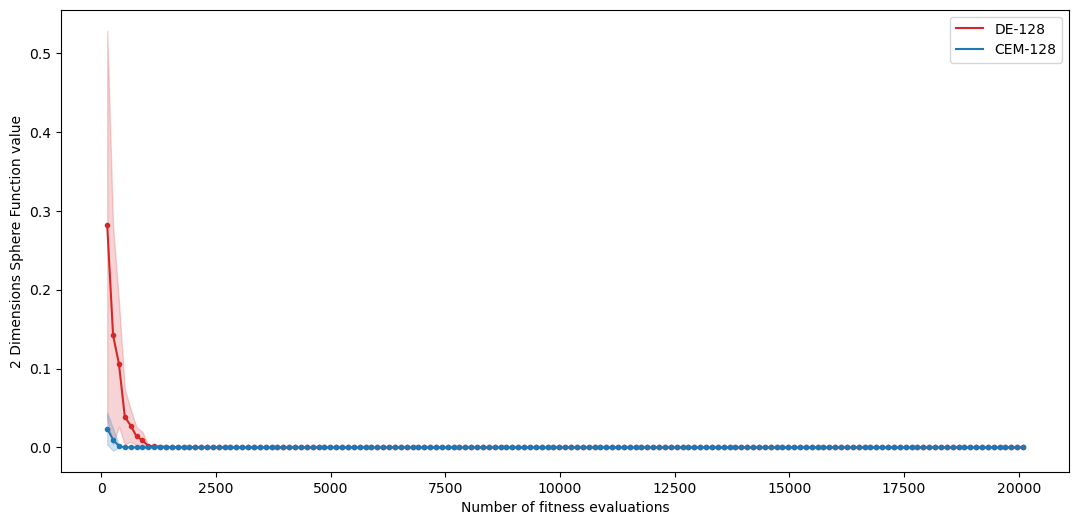

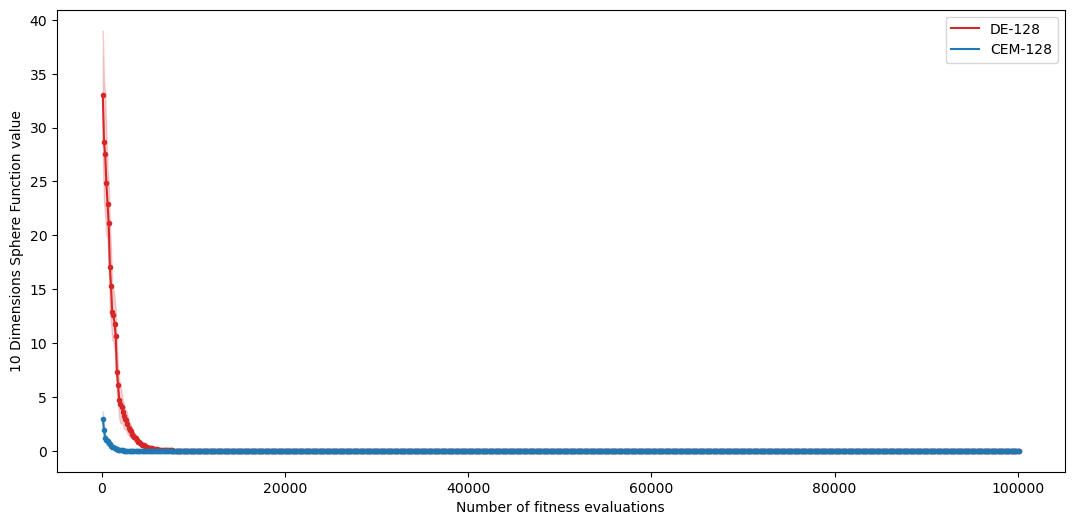

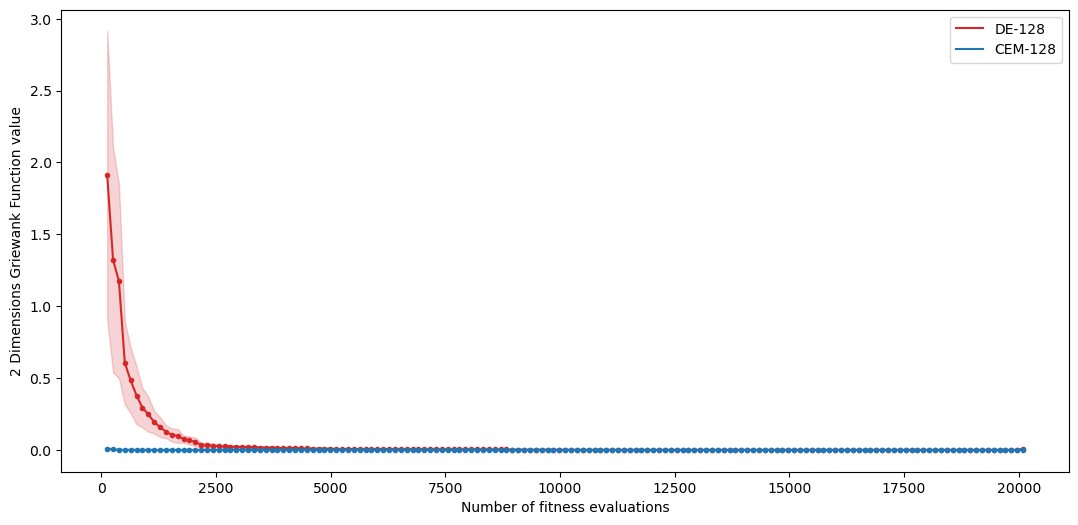

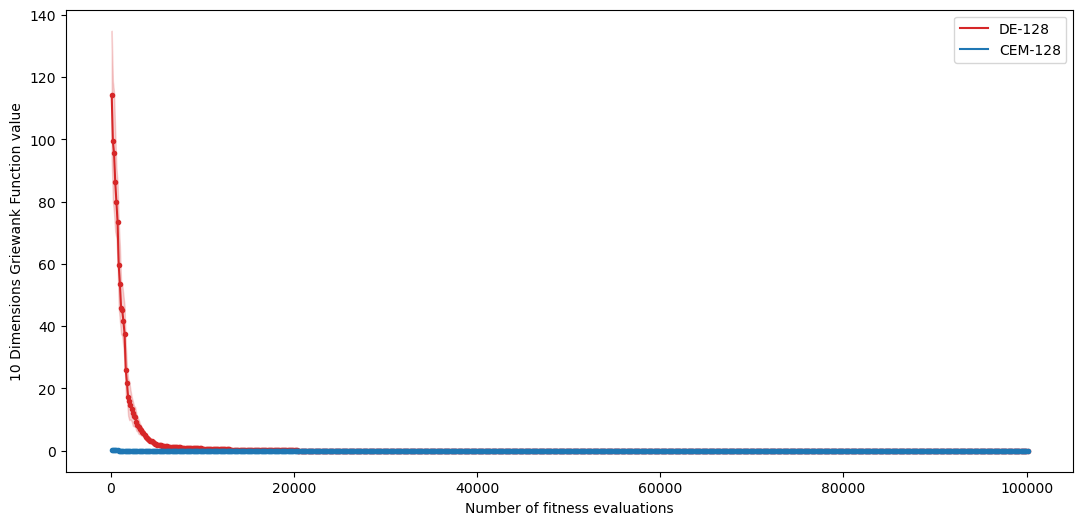

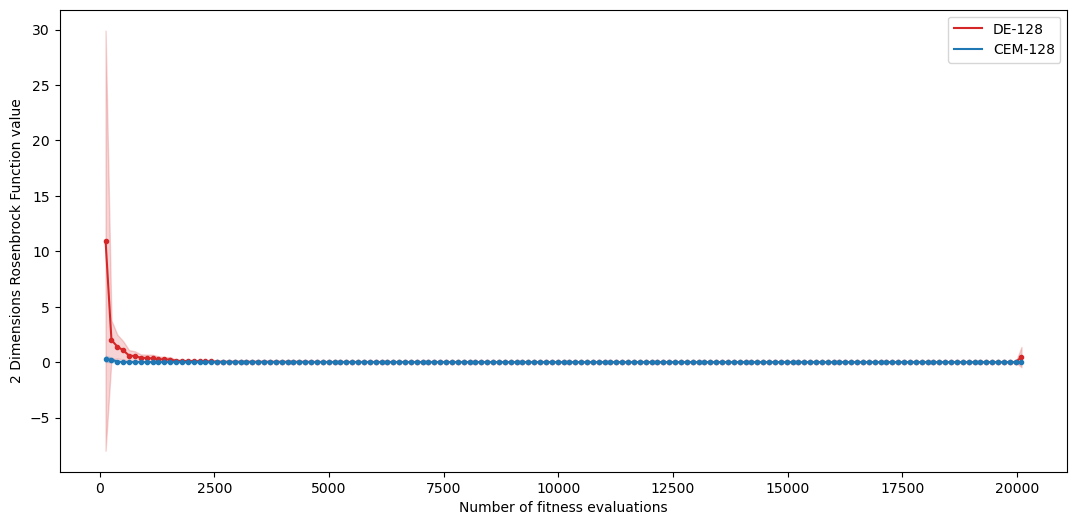

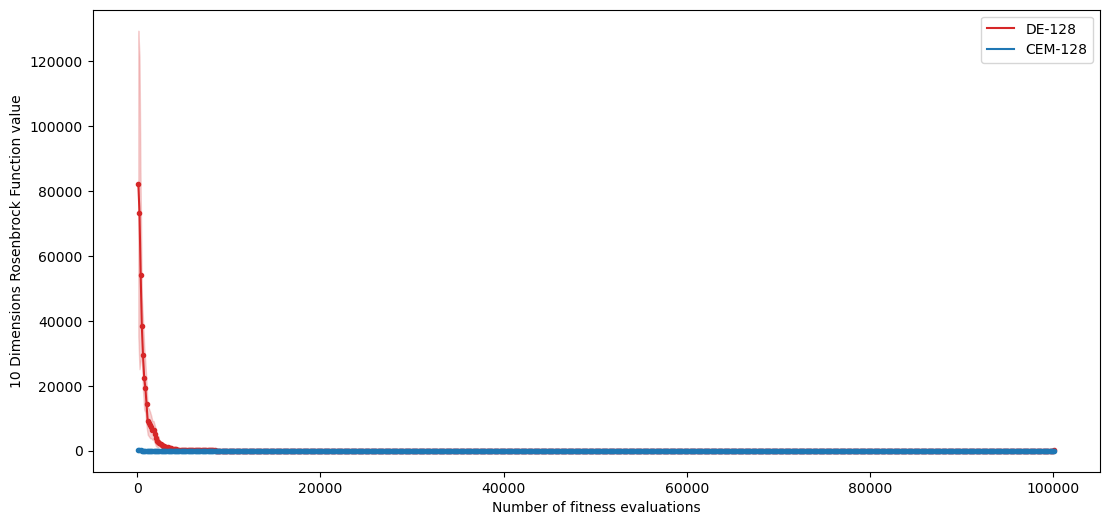

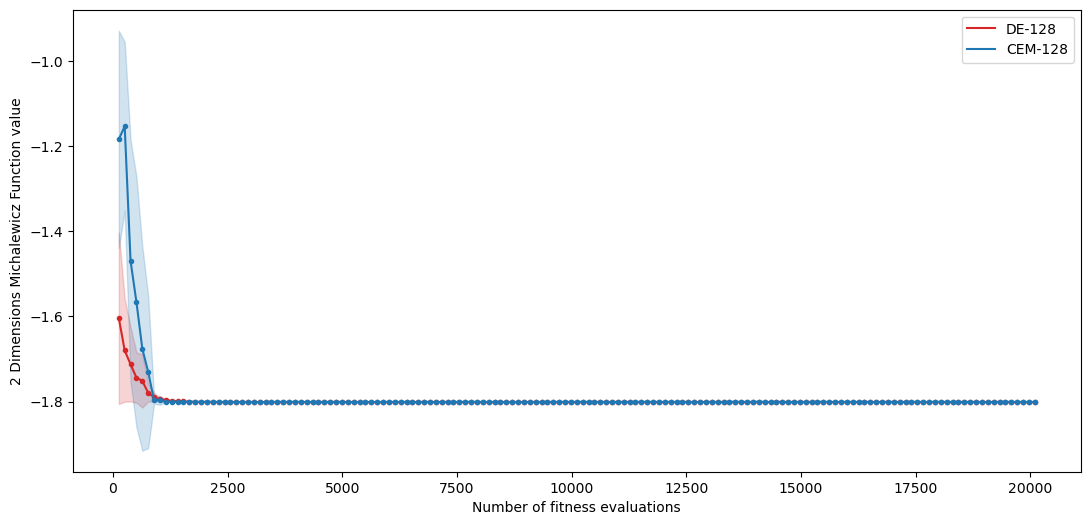

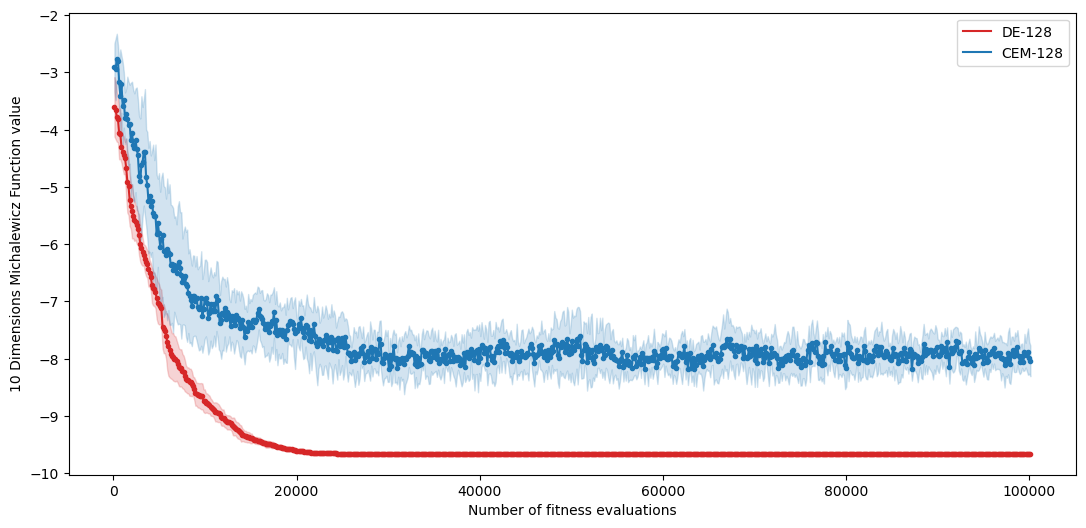

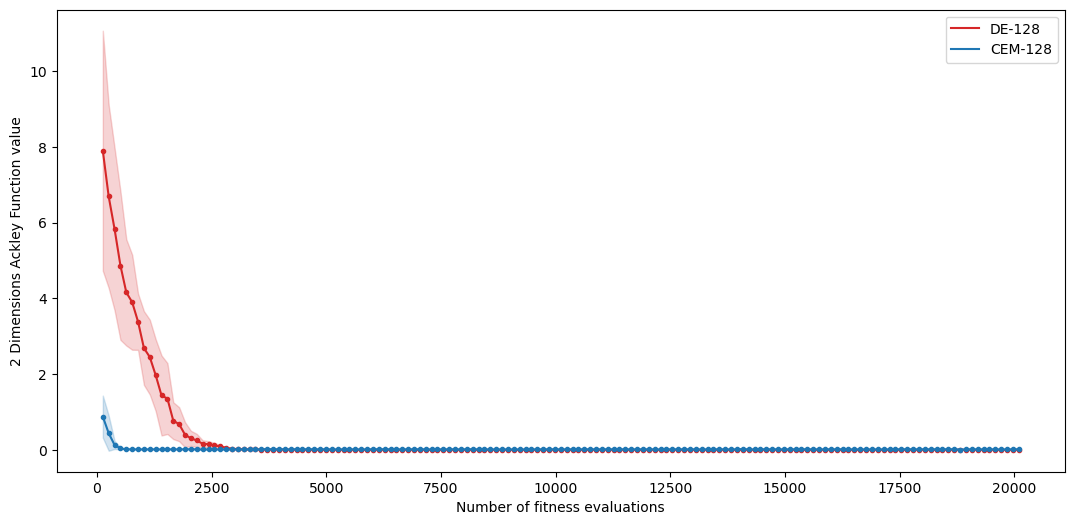

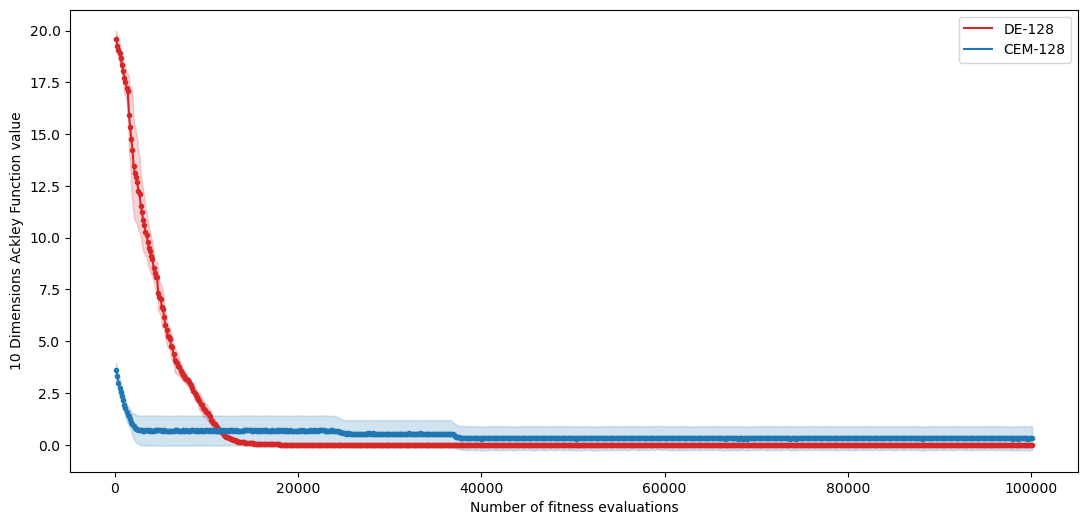

In [37]:
def visualization():
    for objective in objectives:
        for d in dimensions:
            n = 128 
            DE_values = []
            CEM_values = []
    
            for i in range(10):
                key = (objective, d, n, MSSV + i)
                DE_array.append(ProcessResult[key]['DE'])
                CEM_array.append(ProcessResult[key]['CEM'])
    
                x_de = [record[0] for record in ProcessResult[key]['DE']]
                x_cem = [record[0] for record in ProcessResult[key]['CEM']]

                DE_values.append([record[1] for record in ProcessResult[key]['DE']])
                CEM_values.append([record[1] for record in ProcessResult[key]['CEM']])
    
            y_DE_mean, y_DE_std = np.mean(DE_values, axis=0), np.std(DE_values, axis=0)
            y_CEM_mean, y_CEM_std = np.mean(CEM_values, axis=0), np.std(CEM_values, axis=0)
            plotting(x_de, x_cem, y_DE_mean, y_DE_std, y_CEM_mean, y_CEM_std, f"{d} Dimensions {objective}")
            

visualization()